In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
links = pd.read_csv('ml-latest-small/links.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')

In [4]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


<Axes: >

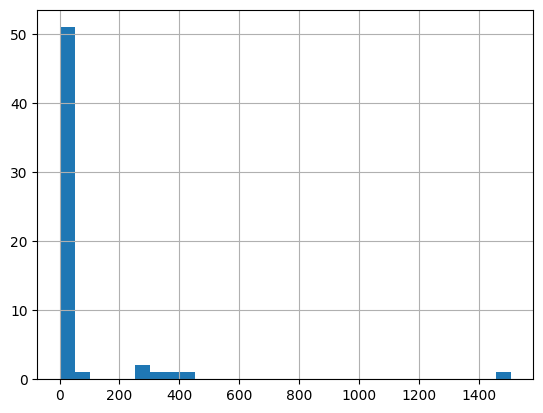

In [5]:
tags.groupby('userId').tag.count().hist(bins=30)

In [6]:
tags.groupby('userId').tag.count().median()

np.float64(4.0)

In [7]:
tags.groupby('userId').tag.count().mean()

np.float64(63.5)

<Axes: >

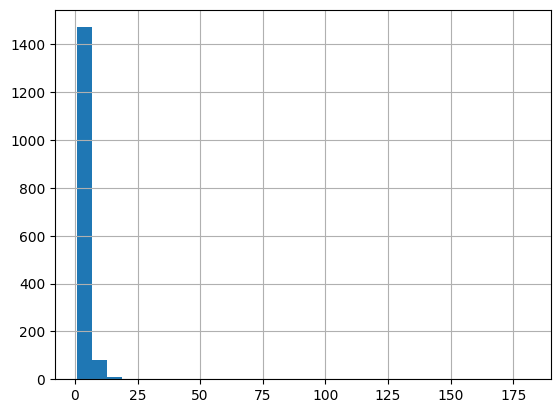

In [8]:
tags.groupby('movieId').tag.count().hist(bins=30)

In [9]:
tags.groupby('movieId').tag.count().mean()

np.float64(2.3428753180661577)

In [10]:
tags.groupby('movieId').tag.count().median()

np.float64(1.0)

In [11]:
year_month = []

from tqdm.notebook import tqdm
for t in tqdm(tags.timestamp.values):
    d = datetime.fromtimestamp(t)
    year_month.append(str(d.year) + '-' + str(d.month))
# for t in tqdm_notebook(tags.timestamp.values):
#     d = datetime.fromtimestamp(t)
#     year_month.append(str(d.year) + '-' + str(d.month))

  0%|          | 0/3683 [00:00<?, ?it/s]

In [12]:
tags['year_month'] = np.array(year_month)

<Axes: xlabel='year_month'>

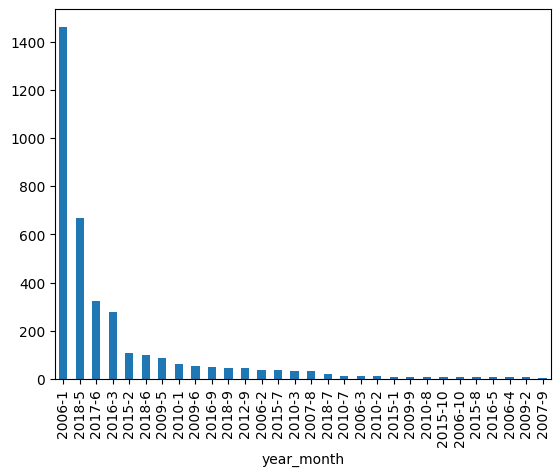

In [13]:
tags.year_month.value_counts()[:30].plot.bar()

<Axes: >

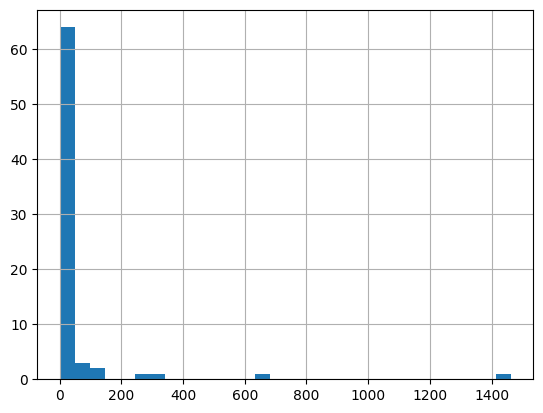

In [14]:
tags.groupby('year_month').tag.count().hist(bins=30)

In [15]:
tags.groupby('year_month').tag.count().mean()

np.float64(50.45205479452055)

In [16]:
tags.groupby('year_month').tag.count().median()

np.float64(5.0)

In [17]:
num_genres_on_movie = [len(g.split('|')) for g in movies.genres.values]

(array([2.851e+03, 3.218e+03, 2.338e+03, 9.870e+02, 2.710e+02, 6.300e+01,
        1.200e+01, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

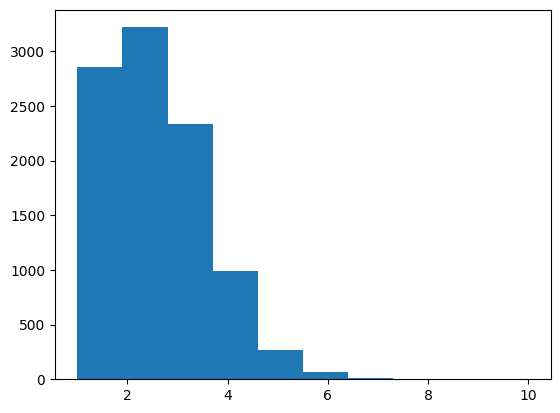

In [18]:
plt.hist(num_genres_on_movie)

In [19]:
np.mean(num_genres_on_movie)

np.float64(2.2668856497639087)

In [20]:
np.median(num_genres_on_movie)

np.float64(2.0)